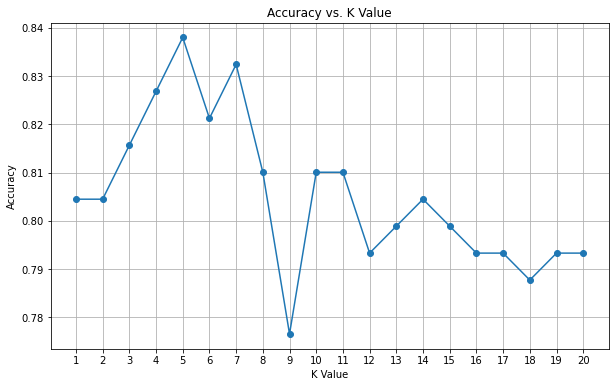

The best K value is K = 5 with an accuracy of 0.84
Mean Cross-Validation Accuracy: 0.80
Standard Deviation of Cross-Validation Accuracy: 0.03
Confusion Matrix:
[[93 12]
 [17 57]]


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('input_train.csv')

# Data preprocessing
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

# Feature engineering
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
train_data.drop(['Age'], axis=1, inplace=True)

# One-hot encoding
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'AgeGroup'], dtype=int)

# Standard Scaler
def standard_scaler(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    scaled_data = (data - mean) / std
    return scaled_data

# Scale relevant features
features_to_scale = ['Fare']
train_data[features_to_scale] = standard_scaler(train_data[features_to_scale])

# Split the dataset into features (X) and target variable (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine the best K value using accuracy visualization
k_values = list(range(1, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

best_k = k_values[np.argmax(accuracy_scores)]

# Visualize accuracy vs. K value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print(f"The best K value is K = {best_k} with an accuracy of {max(accuracy_scores):.2f}")

# Run 5-fold cross-validation and report mean and standard deviation
knn_cv = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(knn_cv, X, y, cv=5, scoring='accuracy')

mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)

print(f"Mean Cross-Validation Accuracy: {mean_cv_accuracy:.2f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_accuracy:.2f}")

# Evaluate using confusion matrix
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Print results
print("Confusion Matrix:")
print(conf_matrix_best)



The accuracy is 84% when k-value is 5 neighbors